1. Gerekli kütüphaneler

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

2. Veriyi okuma

In [3]:
train_df = pd.read_csv("datasets/processed_train_data.csv")
test_df = pd.read_csv("datasets/processed_test_data.csv")

X_train = train_df.drop(columns=["Thyroid_Cancer_Risk"])
y_train = train_df["Thyroid_Cancer_Risk"]

X_test = test_df.drop(columns=["Thyroid_Cancer_Risk"])
y_test = test_df["Thyroid_Cancer_Risk"]

3. Farklı dereceler ile modele uygulama (2 ve 3)

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

degrees = [2, 3]
results = {}

for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results[deg] = {
        'model': model,
        'R²': r2,
        'MSE': mse,
        'MAE': mae,
        'y_pred': y_pred
    }

    print(f"\nDerece {deg} için sonuçlar:")
    print(f"  R²:  {r2:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")


Derece 2 için sonuçlar:
  R²:  0.5959
  MSE: 0.2146
  MAE: 0.4284

Derece 3 için sonuçlar:
  R²:  0.6024
  MSE: 0.2111
  MAE: 0.4270


4. Tahmin grafikleri

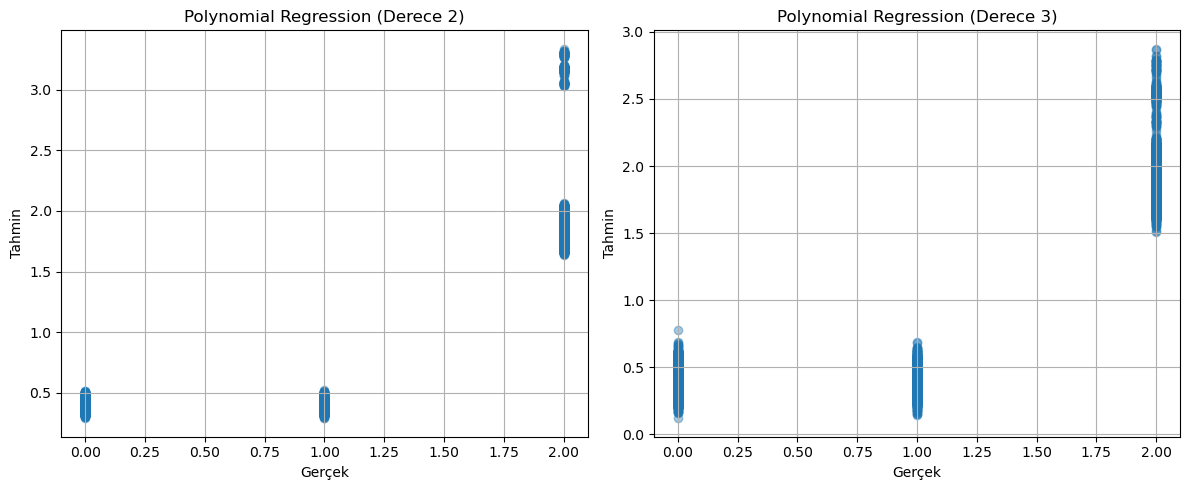

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
for i, deg in enumerate(degrees):
    plt.subplot(1, 2, i+1)
    plt.scatter(y_test, results[deg]['y_pred'], alpha=0.4)
    plt.xlabel("Gerçek")
    plt.ylabel("Tahmin")
    plt.title(f"Polynomial Regression (Derece {deg})")
    plt.grid(True)
plt.tight_layout()
plt.show()